In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 3D Plots

## Surface Plots

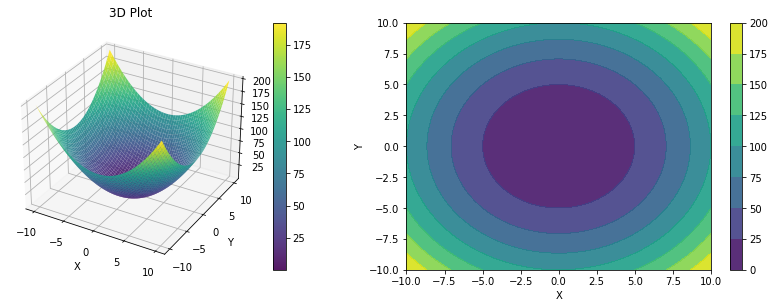

In [2]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

X , Y = np.meshgrid(x,y)
z = X ** 2 + Y ** 2

fig = plt.figure(figsize=(15,10))

axs = fig.add_subplot(2,2,1,projection='3d')
a = axs.plot_surface(X,Y,z , cmap='viridis',alpha=0.9)
axs.set_xlabel('X')
axs.set_ylabel('Y')
axs.set_zlabel('Z')
axs.set_title('3D Plot')
fig.colorbar(a)

ax2 = fig.add_subplot(2,2,2)
b = ax2.contourf(X,Y,z,cmap='viridis',alpha=0.9)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

fig.colorbar(b)

## Scatter and Line Plot

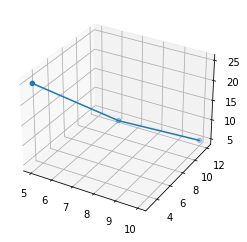

In [3]:
a = [5,7,10]
b = [3,9,12]
c = [25,10,5]

fig = plt.figure()
ax = plt.subplot(projection='3d')

ax.scatter3D(a,b,c)
ax.plot3D(a,b,c)
plt.show()


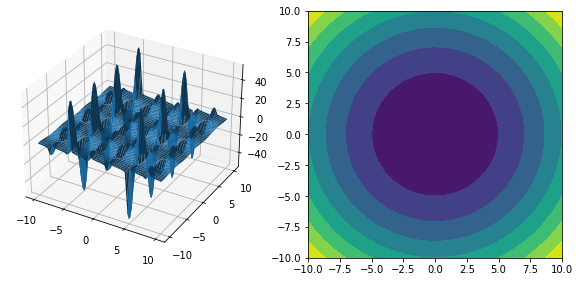

In [4]:
t = np.tan(X) * np.cos(Y)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1,projection='3d')
ax.plot_surface(X,Y,t)
ax2 = plt.subplot(2,2,2)
ax2.contourf(X,Y,z)



## HEATMAP

In [5]:
delivery = pd.read_csv(r'C:\Users\BHAVESH\Matplotlib\IPL_Ball_by_Ball_2008_2022 (1).csv')
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
df = delivery[(delivery['ballnumber'].isin([1,  2,  3,  4,  5,  6])) & (delivery['batsman_run'] == 6)]
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
16,1312200,1,2,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
22,1312200,1,3,5,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
103,1312200,1,17,2,TA Boult,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
107,1312200,1,17,6,OC McCoy,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
142,1312200,2,3,5,MS Wade,M Prasidh Krishna,Shubman Gill,NaN,6,0,6,0,0,NaN,NaN,NaN,Gujarat Titans


In [7]:
grid = df.pivot_table(index='overs',columns='ballnumber',values='batsman_run',aggfunc='count',dropna=True)
grid

ballnumber,1,2,3,4,5,6
overs,,,,,,
0,9,17,31,39,33,27
1,31,40,49,56,58,54
2,75,62,70,72,58,76
3,60,74,74,103,74,71
4,71,76,112,80,81,72
5,77,102,63,86,78,80
6,34,56,49,59,64,38
7,59,62,73,70,69,56
8,86,83,79,81,73,52


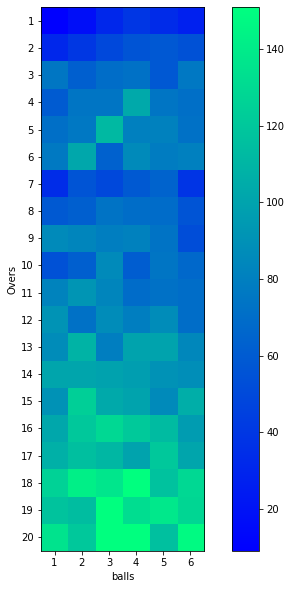

In [8]:
fig = plt.figure(figsize=(10,10))
plt.imshow(grid,cmap='winter')
plt.colorbar()
plt.xlabel('balls')
plt.ylabel('Overs')
plt.yticks(delivery['overs'].unique(),list(range(1,21)))
plt.xticks(np.arange(0,6),list(range(1,7)))
plt.show()

<AxesSubplot:xlabel='ballnumber', ylabel='overs'>

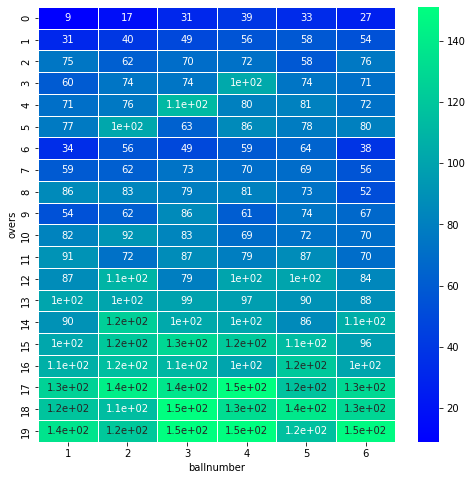

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(data=grid,annot=True,linewidths=0.5,cmap='winter')